In [13]:
# First code block is the import libraries  
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [50]:
dataPath = '../spaceship-titanic_rawData/spaceship_train.csv'


df_spaceship = pd.read_csv(dataPath)

df_spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [51]:
df_spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Transported
True     4378
False    4315
Name: count, dtype: int64


<Axes: xlabel='Transported', ylabel='count'>

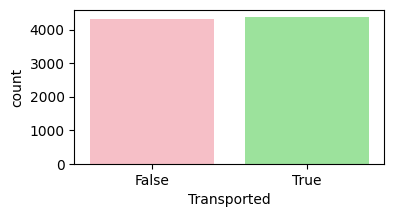

In [52]:
# Ratio of target variable
print(df_spaceship["Transported"].value_counts())

plt.figure(figsize=(4,2))
colors = ["lightpink", "lightgreen"]  # Define desired colors
sns.countplot(df_spaceship, x="Transported", hue="Transported", legend=False, palette=colors)

In [53]:
# Check number of null values
df_spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [54]:
# handling the NaN empty cell
def df_fill_nan(df: pd.DataFrame):
    df["VIP"].fillna(df.VIP.mode()[0], inplace=True)
    df["Cabin"].fillna(df.Cabin.mode()[0], inplace=True)
    df["HomePlanet"].fillna(df.HomePlanet.mode()[0], inplace=True)
    df["Destination"].fillna(df.Destination.mode()[0], inplace=True)


    df["CryoSleep"].fillna(False, inplace=True)
    df["Age"].fillna(df.Age.mean(), inplace=True)

    df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(0)
    
    return df

In [43]:
df_processedTrain = df_fill_nan(df_spaceship)

print(f"Length of the data: {len(df_processedTrain)}")
df_processedTrain.isnull().sum()

Length of the data: 8693


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Cabin_Decks       0
Cabin_row         0
Cabin_seat        0
dtype: int64

In [55]:
# handling the seat of passengers 
df_processedTrain[['Cabin_deck','Cabin_num','Cabin_side']] = df_processedTrain['Cabin'].str.split('/',expand=True)

In [56]:
# handling spending of each passengers : RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
df_processedTrain.loc[:, ['Total_spending']] = df_processedTrain['RoomService'] + df_processedTrain['FoodCourt'] + df_processedTrain['ShoppingMall'] + df_processedTrain['Spa'] + df_processedTrain['VRDeck']

In [57]:
# handling the name of passengers
# df_processedTrain.loc[:, ['First_Name','Last_Name']] = df_processedTrain['Name'].str.extract('(\w+)\s(\w+)', expand=True)


# Extract first and last names
name_parts = df_processedTrain['Name'].str.extract('(\w+)\s(\w+)', expand=True)

# Assign extracted names to DataFrame
df_processedTrain['First_Name'] = name_parts[0].astype(str)
df_processedTrain['Last_Name'] = name_parts[1].astype(str)

In [58]:
df_processedTrain

,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_deck,Cabin_num,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_spending,First_Name,Last_Name
0,0001_01,Europa,False,B/0/P,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,Juanna,Vines
2,0003_01,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,Altark,Susent
3,0003_02,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,Solam,Susent
4,0004_01,Earth,False,F/1/S,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,A,98,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,Gravior,Noxnuther
8689,9278_01,Earth,True,G/1499/S,G,1499,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,Kurta,Mondalley
8690,9279_01,Earth,False,G/1500/S,G,1500,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,Fayey,Connon
8691,9280_01,Europa,False,E/608/S,E,608,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,Celeon,Hontichre


In [62]:
df_AllData = df_processedTrain[
    [   'PassengerId', 'HomePlanet', 'CryoSleep',
        'Cabin', 'Cabin_deck', 'Cabin_num', 'Cabin_side', 
        'Destination', 'Age',
        'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_spending',
        'Name', 'First_Name', 'Last_Name',
        'Transported'
    ]
]

In [63]:
df_AllData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_deck,Cabin_num,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spending,Name,First_Name,Last_Name,Transported
0,0001_01,Europa,False,B/0/P,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,Maham,Ofracculy,False
1,0002_01,Earth,False,F/0/S,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,Juanna Vines,Juanna,Vines,True
2,0003_01,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,Altark Susent,Altark,Susent,False
3,0003_02,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,Solam Susent,Solam,Susent,False
4,0004_01,Earth,False,F/1/S,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,Willy Santantines,Willy,Santantines,True


In [64]:
df_processedData = df_processedTrain[
    [   'PassengerId', 'HomePlanet', 'CryoSleep',
        'Cabin_deck', 'Cabin_num', 'Cabin_side', 
        'Destination', 'Age',
        'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_spending',
        'First_Name', 'Last_Name',
        'Transported'
    ]
]

In [67]:
df_processedData

,PassengerId,HomePlanet,CryoSleep,Cabin_deck,Cabin_num,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spending,First_Name,Last_Name,Transported
0,0001_01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,Maham,Ofracculy,False
1,0002_01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,Juanna,Vines,True
2,0003_01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,Altark,Susent,False
3,0003_02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,Solam,Susent,False
4,0004_01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,Willy,Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,98,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,8536.0,Gravior,Noxnuther,False
8689,9278_01,Earth,True,G,1499,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0,Kurta,Mondalley,False
8690,9279_01,Earth,False,G,1500,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1873.0,Fayey,Connon,True
8691,9280_01,Europa,False,E,608,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,4637.0,Celeon,Hontichre,False


In [68]:
df_processedData.dtypes

PassengerId        object
HomePlanet         object
CryoSleep            bool
Cabin_deck         object
Cabin_num          object
Cabin_side         object
Destination        object
Age               float64
VIP                  bool
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
Total_spending    float64
First_Name         object
Last_Name          object
Transported          bool
dtype: object

In [70]:
# Export splitted data

file_name = '../preprocess_dataset/splittedData_01.csv'

df_processedData.to_csv(file_name, sep=',', encoding='utf-8', index=False)

In [ ]:
# df_spaceship = pd.read_csv(
#     filepath_or_buffer = dataPath,
#     dtype = {
#         "PassengerId": str,
#         "HomePlanet": str,
#         "CryoSleep": pd.BooleanDtype(),
#         "Cabin": str,
#         "Destination": str,
#         "Age": np.int64 | None,
#         "VIP": pd.BooleanDtype(),
#         "RoomService": np.int64 | None,
#         "FoodCourt": np.int64 | None,
#         "ShoppingMall": np.int64 | None,
#         "Spa": np.int64 | None,
#         "VRDeck": np.int64 | None,
#         "Name": str,
#         "Transported": bool,
#     }
# )